## Ask

1)	Identify Business Task: <br>
Target consumer needs based on data collected via smart devices. Inform marketing department how these trends can boost future sales.

2)	Key Stakeholders:<br>
•	Cofounders
•	Marketing Analytics team

3)	Business Task<br>
Investigate and identify user patterns from FitBit fitness trackere data and incorporate it into Bellabeat’s marketing strategy.


## Prepare 
The data is taken from a publicly available database, which includes the data for 30 FitBit users. Specific areas of health such as calories, sleep, physical intensities, number of steps and weight are divided into separate tables. 

Some problems with the dataset include, Using ROCCC:<br>
1)	Reliability: Small sample of 30 people considered<br>
2)	Originality: Data does not directly come from FitBit but from a third-party source<br>
3)	Current: Data is 5 years old and is not relevant<br>

## Process
1. Import libraries
2. Load relevant datasets used for analysis
3. Identify if data is clean and ready to use

In [1]:
#Import Relevant Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt 

In [2]:
#Load Dataset
dActiv = pd.read_csv("dailyActivity_merged.csv")
#We also look into the sleep times for users as we donot have that data present in the above dataset
sleep = pd.read_csv("sleepDay_merged.csv")

In [3]:
#Visualize part of the dataset
dActiv.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
#Identify relavant data types and number of rows and columns (Rows = 940, Columns = 15)
dActiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
#Identify Null values if present
dActiv.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
#Check the number of unique Ids in our dataset
dActiv["Id"].nunique()

33

Although our dataset has no null values, the number of unique Ids is 33 in our dataset unlike 30 as we expected. An explanation to this maybe that some users have more fitbit Ids but that is unlikely and given that a third party provided us the data, there might be some error in the data gathering process increasing the total users from 30 to 33. <br>
From above we can see that the ActivityDate column is identified as an object, so we need to convert it to datetime

In [7]:
#Converting to year - month - date formate
dActiv["ActivityDate"] = pd.to_datetime(dActiv["ActivityDate"])
dActiv["ActivityDate"]

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]

In [8]:
#We follow the same procedure for checking a clean dataset along with investigating datatypes as above
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [9]:
sleep.info()
sleep.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [10]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [11]:
#SleepDay is identified as an object, we convert it into datetime formate.
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])

## Analyze
1) Perform Calculations<br>
2) Organize and format data<br>
3) Check for trends and perform statistical analysis

In [12]:
#We copy to another dataframe to perform calculations, while still keeping the original dataframe intact
df = dActiv.copy()

In [13]:
#Find the Total Active Minutes spent
df["TotalActiveMinutes"] = (df["VeryActiveMinutes"] + 
                            df["FairlyActiveMinutes"] + 
                            df["LightlyActiveMinutes"]+
                            df["SedentaryMinutes"])

#Define a new parameter for heavy activity consisting of fairly active and very active minutes and convert to hours
df["ActiveHours"] = (df["VeryActiveMinutes"] + 
                    df["FairlyActiveMinutes"]+
                    df["LightlyActiveMinutes"])/60

df["Day"] = df["ActivityDate"].dt.day_name()

In [14]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,ActiveHours,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,6.100000,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,4.283333,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,3.700000,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,4.533333,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,4.450000,Saturday


In [15]:
#Find General descriptive statistics from the data
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,ActiveHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,3.792376
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,2.029605
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,2.445833
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,4.116667
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,5.287500
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,9.200000


We see from the above graph that the average number of steps is 7637 with an average distance of 5.48 Km per day with the highest distance being light active distance travelled at 3.34 Km per day. The mean number of combined active minutes is 1218 minutes with most of this being Sedentary minutes with an average of 991 minutes

In [17]:
#Use another dataframe for sleep schedule to still keep original intact
df2 = sleep.copy()

In [18]:
#Calculate the time wasted in bed
df2["TimeWastedBed"] = df2["TotalTimeInBed"] - df2["TotalMinutesAsleep"]
#Convert total sleep time to hours
df2["TotalHoursAsleep"] = df2["TotalMinutesAsleep"]/60
#Find percentage of time wasted
df2["PercentTimeWasted"] = df2["TimeWastedBed"]/df2["TotalTimeInBed"] * 100
#Find day of the week
df2["Day"] = df2["SleepDay"].dt.day_name()

In [19]:
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeWastedBed,TotalHoursAsleep,PercentTimeWasted,Day
0,1503960366,2016-04-12,1,327,346,19,5.450000,5.491329,Tuesday
1,1503960366,2016-04-13,2,384,407,23,6.400000,5.651106,Wednesday
2,1503960366,2016-04-15,1,412,442,30,6.866667,6.787330,Friday
3,1503960366,2016-04-16,2,340,367,27,5.666667,7.356948,Saturday
4,1503960366,2016-04-17,1,700,712,12,11.666667,1.685393,Sunday


In [20]:
#Find general statistics for 
df2.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeWastedBed,TotalHoursAsleep,PercentTimeWasted
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,39.171913,6.991122,8.323079
std,2.060360e+09,0.345521,118.344679,127.101607,46.570095,1.972411,8.703885
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000,0.966667,0.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,17.000000,6.016667,3.931204
50%,4.702922e+09,1.000000,433.000000,463.000000,25.000000,7.216667,5.687204
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000,8.166667,8.781870
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000,13.266667,50.163934


The average user sleeps once a day as expected, with the average hours asleep being approximately 7 horus. The time wasted in bed is around 8% of the total time spent in bed.

## Share

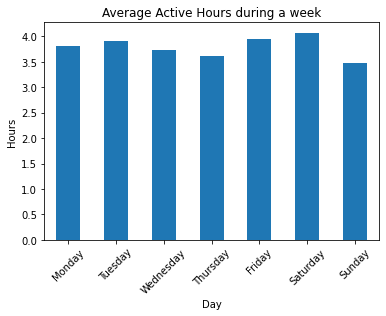

In [22]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('Day')["ActiveHours"].mean().reindex(cats).plot(kind = 'bar', 
                                                                ylabel = 'Hours', 
                                                                title = "Average Active Hours during a week",
                                                                rot=45);

We can see the highest active hour for our users is during Saturday, however a surprising thing to note is that Sunday is not the 2nd most active time for users, instead it is Friday, as we expect users to excercise during weekends. However, this does not seem to be the case from the data. Our Users prefer to rest during Sunday and during the midweek on Thursday and Friday instead of doing Heavy Excercise.

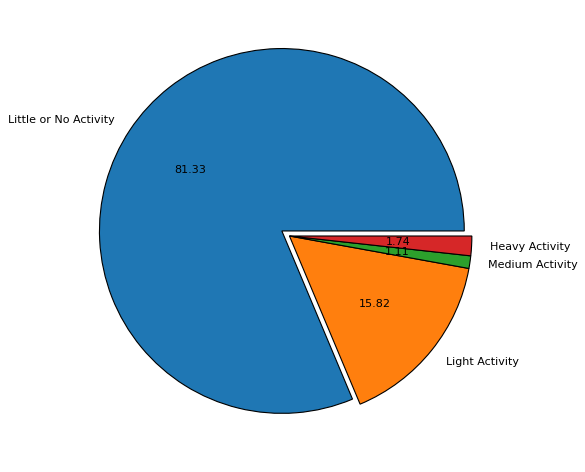

In [23]:
pieslice = [df.SedentaryMinutes.sum(), df.LightlyActiveMinutes.sum(), df.FairlyActiveMinutes.sum(), df.VeryActiveMinutes.sum()]
pielabel = ["Little or No Activity", "Light Activity", "Medium Activity", "Heavy Activity",];
plt.figure(figsize=(12, 6), dpi=80);
plt.pie(pieslice,labels = pielabel, autopct = "%0.2f", explode = [0.05,0,0,0], wedgeprops = {"edgecolor": "black"});
plt.tight_layout()

We can infer from the above diagram that most of the users track their daily patterns from their application such as daily commute, movements during work etc. However either little excercising is tracked or our userbase does not perform that much heavy activity on a daily basis, as sedentary active minutes rank the highest at 81.3%.

In [24]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,ActiveHours,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,6.100000,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,4.283333,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,3.700000,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,4.533333,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,4.450000,Saturday


Text(1, 12, 'Average Distance= 5.489702')

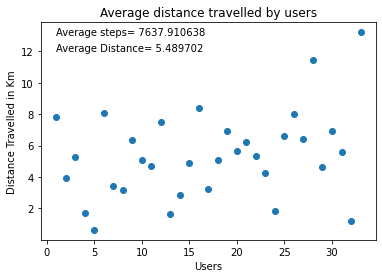

In [25]:
plt.scatter(range(1,34),df.groupby('Id')["TotalDistance"].mean());
plt.title("Average distance travelled by users");
plt.xlabel("Users");
plt.ylabel("Distance Travelled in Km");
plt.text(1, 13, 'Average steps= %f'%df.TotalSteps.mean())
plt.text(1, 12, 'Average Distance= %f'%df.TotalDistance.mean())

From the above graph we can see that most of the users donot have a healthy lifestyle, as we see the average steps being under 10,000 and average distance being less than 8km, which is considered unhealthy. [Healthy Number of Steps](https://www.healthline.com/health/how-many-steps-a-day#Why-10,000-steps?) are above the range we currently have, however we do notice some users performing more than the recommended amount which is quite good but too few amongst our data.

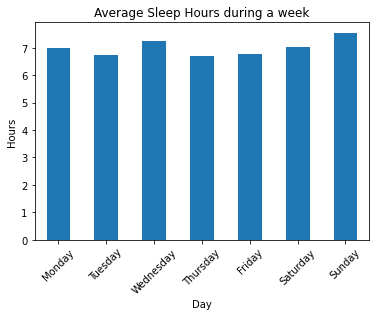

In [26]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2.groupby('Day')["TotalHoursAsleep"].mean().reindex(cats).plot(kind = 'bar', 
                                                                ylabel = 'Hours', 
                                                                title = "Average Sleep Hours during a week",
                                                                rot=45);

On average users sleep 6.5 to 7 hours per day which is healthy with Sunday having the highest on average sleep time, and Thursday having the lowest  for the userbase. Sunday is not surprising due to it being a weekend.

## Act



We can see from the above data, users are not performing activities upto the recommended level. 81% of the userbase tracks their non-active hours and whether active hours are recorded fully is another question that can be explored via survey.

Our marketing team can help in educating the userbase during peak active hours on Saturday and Friday, by slowly increasing their workour intensity to make them catchup to the recommended health standards. Small reminders can also be made on weekdays or non-workout days aswell or set an improvement goal for each user.